In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import re
import os

In [3]:
sns.set_style('darkgrid', {'legend.frameon':True})
PATH = "D:/Aurelien/Documents/Aurelien/University/Master 1 (2021-2022)/MA1 - Q2/INFO-H410 - Techniques of Artificial Intelligence - BERSINI Hugues/Projets/AI_Othello/Results/"
os.chdir(PATH)

In [128]:
def create_df():
    folder = 'Pruning/'
    d = pd.DataFrame()
    for file in os.listdir(folder): 
        df = pd.read_csv(folder + file)
        df.columns = ['Round', *df.columns[1:]]
        df["Round"] = df["Round"] + 1
        try:
            df["Depth"] = str(int(file[0]))
            df["Score"] = df["Black"] - df["White"]
            df = df[df["Color"]==" X "]
        except:
            df["Depth"] = str(int(file[2]))
            df["Score"] = df["White"] - df["Black"]
            df = df[df["Color"]==" O "]
        if 'p' in file:
            df["Pruning"] = False
        else:
            df["Pruning"] = True
        df["Log_Time"] = np.log10(1+df["Time"])
        d = pd.concat([d, df], axis=0, ignore_index=True)
    return d

In [130]:
def create_df_depth(i):
    folder = 'Pruning/'
    d = pd.DataFrame()
    for file in os.listdir(folder):
        if str(i)+'_' in file or str(i)+'p_' in file:
            #print(file)
            df = pd.read_csv(folder + file)
            df.columns = ['Round', *df.columns[1:]]
            df["Round"] = df["Round"] + 1
            try:
                df["Depth"] = str(int(file[0]))
                df["Score"] = df["Black"] - df["White"]
                df = df[df["Color"]==" X "]
            except:
                df["Depth"] = str(int(file[2]))
                df["Score"] = df["White"] - df["Black"]
                df = df[df["Color"]==" O "]
            if 'p' in file:
                df["Pruning"] = False
            else:
                df["Pruning"] = True
            df["Log_Time"] = np.log10(1+df["Time"])
            d = pd.concat([d, df], axis=0, ignore_index=True)
    return d

In [153]:
create_df().to_csv(('Graphs/' + 'pruning.csv'))

Depth 1


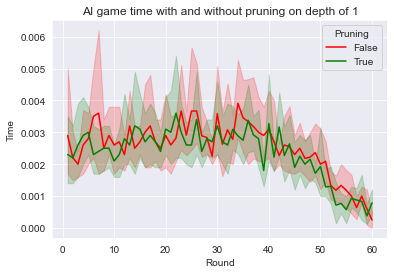

Depth 2


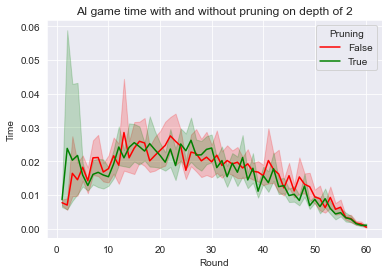

Depth 3


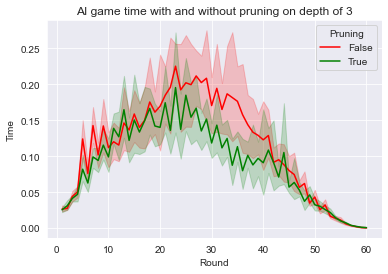

Depth 4


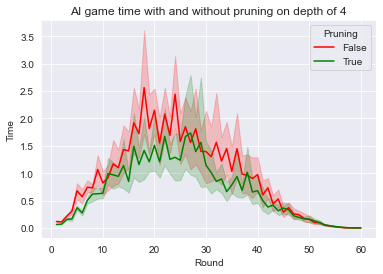

Depth 5


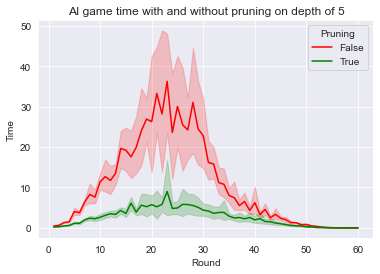

Depth 6


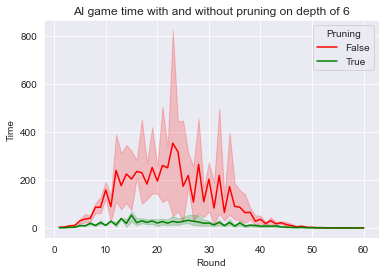

In [177]:
for i in range(1,7):
    print(f"Depth {i}")
    sns.lineplot(data=create_df_depth(i), x="Round", y="Time", hue="Pruning", palette=('red','green'))
    
    plt.title(f"AI game time with and without pruning on depth of {i}")
    plt.ylabel('Time')
    plt.xlabel('Round')
    
    plt.savefig('./Graphs/' + 'pruning_' + str(i) + '_time' + '.png')
    
    plt.show()

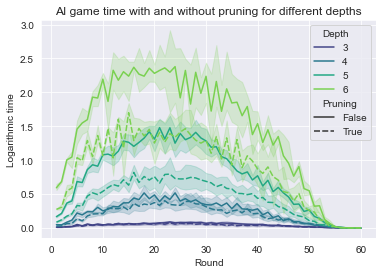

In [178]:
sns.lineplot(data=create_df(), x="Round", y="Log_Time", style="Pruning", hue="Depth", hue_order=['3','4','5','6'], palette=sns.color_palette("viridis", 4))

plt.title("AI game time with and without pruning for different depths")#, size=16)
plt.ylabel('Logarithmic time')#, size=16)
plt.xlabel('Round')
    
plt.savefig('./Graphs/' + 'pruning_all_time' + '.png')

# Quality

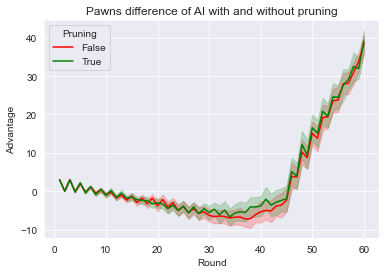

In [179]:
sns.lineplot(data=create_df(), x="Round", y="Score", hue="Pruning", palette=('red','green'))
#sns.lineplot(x=range(0,61), y=0, color='lightgray')
plt.title("Pawns difference of AI with and without pruning")#, size=16)
plt.ylabel('Advantage')#, size=16)
plt.xlabel('Round')
    
plt.savefig('./Graphs/' + 'pruning_score' + '.png')